<a href="https://colab.research.google.com/github/JasmineSingh1/Supervised-Machine-Learning/blob/main/Lasso_regression_using_LassoCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240522154643/auto-mpg%5B1%5D.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [7]:
X = df.drop('mpg', axis = 1)
y = df['mpg']

In [8]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,4,97.0,52,2130,24.6,82,2,vw pickup
395,4,135.0,84,2295,11.6,82,1,dodge rampage
396,4,120.0,79,2625,18.6,82,1,ford ranger


In [9]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [10]:
# If there are categorical columns (like origin, car name), encode them:
if 'car name' in X.columns:
    X = X.drop(columns=['car name'])

In [11]:
if 'origin' in X.columns:
    X = pd.get_dummies(X, columns=['origin'], drop_first=True)

In [12]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
0,8,307.0,130,3504,12.0,70,False,False
1,8,350.0,165,3693,11.5,70,False,False
2,8,318.0,150,3436,11.0,70,False,False
3,8,304.0,150,3433,12.0,70,False,False
4,8,302.0,140,3449,10.5,70,False,False
...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,False,False
394,4,97.0,52,2130,24.6,82,True,False
395,4,135.0,84,2295,11.6,82,False,False
396,4,120.0,79,2625,18.6,82,False,False


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [14]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
3,8,304.0,150,3433,12.0,70,False,False
18,4,97.0,88,2130,14.5,70,False,True
376,4,91.0,68,2025,18.2,82,False,True
248,4,91.0,60,1800,16.4,78,False,True
177,4,115.0,95,2694,15.0,75,True,False
...,...,...,...,...,...,...,...,...
71,3,70.0,97,2330,13.5,72,False,True
106,8,350.0,180,4499,12.5,73,False,False
270,4,134.0,95,2515,14.8,78,False,True
348,4,89.0,62,2050,17.3,81,False,True


In [15]:
# Replace '?' with NaN in the 'horsepower' column
X_train['horsepower'] = X_train['horsepower'].replace('?', np.nan)
X_test['horsepower'] = X_test['horsepower'].replace('?', np.nan)

# Convert the 'horsepower' column to numeric
X_train['horsepower'] = pd.to_numeric(X_train['horsepower'])
X_test['horsepower'] = pd.to_numeric(X_test['horsepower'])

# Fill NaN values with the mean of the 'horsepower' column
X_train['horsepower'] = X_train['horsepower'].fillna(X_train['horsepower'].mean())
X_test['horsepower'] = X_test['horsepower'].fillna(X_test['horsepower'].mean())

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[ 1.52718818,  1.0901965 ,  1.26234796, ..., -1.6966673 ,
        -0.46232073, -0.51176632],
       [-0.85051483, -0.92299623, -0.41301277, ..., -1.6966673 ,
        -0.46232073,  1.95401684],
       [-0.85051483, -0.98134964, -0.95345171, ...,  1.63897537,
        -0.46232073,  1.95401684],
       ...,
       [-0.85051483, -0.56315019, -0.22385913, ...,  0.52709448,
        -0.46232073,  1.95401684],
       [-0.85051483, -1.00080078, -1.11558339, ...,  1.36100515,
        -0.46232073,  1.95401684],
       [-0.85051483, -0.92299623, -1.54793455, ..., -0.86275663,
         2.16300056, -0.51176632]])

In [19]:
lassocv = LassoCV(alphas=None, cv=5, random_state=42)

In [20]:
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5, random_state=42)

In [24]:
print(lassocv.alpha_, "\n\n")
print(lassocv.alphas_, "\n\n")
print(lassocv.coef_, "\n\n")
print(lassocv.intercept_)

0.01865719984524543 


[6.55090059 6.10939181 5.69763925 5.31363744 4.95551606 4.62153086
 4.31005515 4.01957186 3.74866617 3.49601861 3.26039866 3.0406587
 2.83572848 2.64460987 2.46637202 2.3001468  2.1451246  2.00055038
 1.86571998 1.7399767  1.6227081  1.513343   1.41134875 1.31622857
 1.22751917 1.14478848 1.06763357 0.99567864 0.92857323 0.8659905
 0.80762564 0.75319438 0.7024316  0.65509006 0.61093918 0.56976393
 0.53136374 0.49555161 0.46215309 0.43100551 0.40195719 0.37486662
 0.34960186 0.32603987 0.30406587 0.28357285 0.26446099 0.2466372
 0.23001468 0.21451246 0.20005504 0.186572   0.17399767 0.16227081
 0.1513343  0.14113487 0.13162286 0.12275192 0.11447885 0.10676336
 0.09956786 0.09285732 0.08659905 0.08076256 0.07531944 0.07024316
 0.06550901 0.06109392 0.05697639 0.05313637 0.04955516 0.04621531
 0.04310055 0.04019572 0.03748666 0.03496019 0.03260399 0.03040659
 0.02835728 0.0264461  0.02466372 0.02300147 0.02145125 0.0200055
 0.0186572  0.01739977 0.01622708 0.0151334

In [25]:
y_predictions = lassocv.predict(X_test_scaled)

In [26]:
y_predictions

array([32.25340338, 29.31546146, 21.10185787, 16.92918479, 12.55182587,
       26.60814716, 27.68952025,  9.81709189, 16.95912365, 21.67061106,
       12.84338685, 35.73580917, 24.69435173, 13.78240214, 23.53722204,
        6.40006337, 29.36632327, 25.0189674 , 16.42632578, 35.83303176,
       24.58321805, 18.72528956, 28.69860402, 28.48779101, 14.97093044,
       35.62072318, 26.50489104, 24.59997776, 21.81553713,  8.74973345,
       28.21110789, 36.0018921 , 20.50722624, 25.476857  , 33.77610001,
       12.18400061, 22.88863226, 21.9230236 , 12.42718811, 27.754976  ,
       26.32622188, 28.25193971, 21.19241032,  7.38290865, 23.951479  ,
       34.53238731, 27.73294455, 25.32038572, 23.44594028, 28.56873477,
       22.12918073, 33.19110178, 32.16521961, 10.9614599 , 27.82405618,
        9.9585323 , 19.86877225, 29.39237922, 22.72869227, 20.25452558,
       16.3015245 , 31.442657  , 23.62033056, 21.39200959, 20.7229307 ,
       24.91599215, 24.75873381, 32.15084795, 27.63871934, 12.71

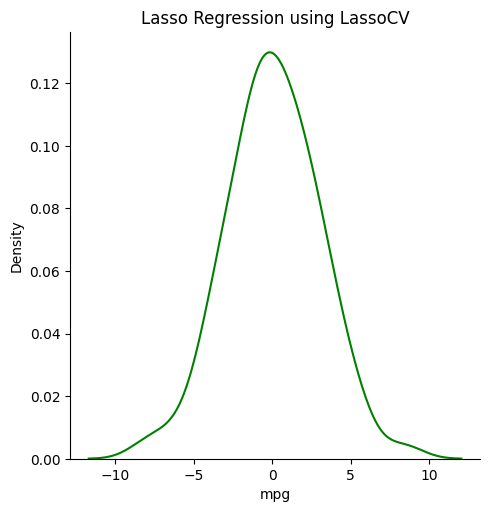

In [27]:
sns.displot(y_test - y_predictions, kind='kde', color= 'green')
plt.title('Lasso Regression using LassoCV')
plt.show()

In [28]:
mse = mean_squared_error(y_true = y_test, y_pred = y_predictions)
r2 = r2_score(y_true = y_test, y_pred = y_predictions)

print(f"Mean Squared Error for Ridge Regression using GridSearchCV: {mse}")
print(f"R-squared Score for Ridge Regression using GridSearchCV: {r2}")

Mean Squared Error for Ridge Regression using GridSearchCV: 8.453120151071804
R-squared Score for Ridge Regression using GridSearchCV: 0.842780746474946
